In [4]:
!pip install pymysql

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.0 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.0 kB 217.9 kB/s eta 0:00:01
   --------------------------- ------------ 30.7/45.0 kB 262.6 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 277.9 kB/s eta 0:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker


In [8]:
# Parámetros de conexión
username = 'root'
password = 'Erethiel00.'
hostname = 'localhost'
database = 'transactionsv2'

# Crear la URI de la base de datos
DATABASE_URI = f'mysql+pymysql://{username}:{password}@{hostname}/{database}'


In [9]:
# Crear el motor de la base de datos
engine = create_engine(DATABASE_URI)

# Crear una sesión
Session = sessionmaker(bind=engine)
session = Session()


creamos un bucle para almacenar las tablas de data frames:

In [16]:
nombres_tabla = pd.read_sql('show tables', engine)
nombres_tabla

,Tables_in_transactionsv2
0,companies
1,credit_cards
2,estado_tarjetas
3,products
4,transaction_products
5,transactions
6,users


In [110]:
# Utilizamos un buble para cargar cada tabla en un DataFrame y crear variables globales
for nombres in nombres_tabla['Tables_in_transactionsv2']:  ## le damos el nombre de la columna para que solo coja los nombres
    print(nombres) #comprovamos que coge solo los nombres de la tabla
    query = f"SELECT * FROM {nombres}" #definimos la query
    df = pd.read_sql(query, engine)
    globals()[f"df_{nombres}"] = df
#buscar como hace run buble para mostrar todos los heads.


        

companies
credit_cards
estado_tarjetas
products
transaction_products
transactions
users


In [55]:
# vamos a comprobar que se hayan cargado bien los data frames y vamos a revisar la información
for encabezado in nombres_tabla['Tables_in_transactionsv2']:
    if f"df_{encabezado}" in globals():
        print(f"INFORMACIÓN DE: df_{encabezado}")
        print("Encabezado de:",f"df_{encabezado}", "\n",globals()[f"df_{encabezado}"].head())
        print("Info de:",f"df_{encabezado}","\n",globals()[f"df_{encabezado}"].info())
        print("\n")
    else:
        print(f"El DataFrame df_{encabezado} no está cargado correctamente en el espacio global.\n")

INFORMACIÓN DE: df_companies
Encabezado de: df_companies 
   company_id                 company_name           phone  \
0     b-2222    Ac Fermentum Incorporated  06 85 56 52 33   
1     b-2226     Magna A Neque Industries  04 14 44 64 62   
2     b-2230                  Fusce Corp.  08 14 97 58 85   
3     b-2234    Convallis In Incorporated  06 66 57 29 50   
4     b-2238  Ante Iaculis Nec Foundation  08 23 04 99 53   

                              email        country  \
0  donec.porttitor.tellus@yahoo.net        Germany   
1       risus.donec.nibh@icloud.org      Australia   
2              risus@protonmail.edu  United States   
3                mauris.ut@aol.couk        Germany   
4       sed.dictum.proin@outlook.ca    New Zealand   

                            website  
0      https://instagram.com/site\r  
1    https://whatsapp.com/group/9\r  
2  https://pinterest.com/sub/cars\r  
3        https://cnn.com/user/110\r  
4    https://netflix.com/settings\r  
<class 'pandas.core.f

In [58]:
for encabezado in nombres_tabla['Tables_in_transactionsv2']:
    if f"df_{encabezado}" in globals():
        print(f"INFORMACIÓN DE: df_{encabezado}")
        print("Encabezado de:",f"df_{encabezado}", "\n",globals()[f"df_{encabezado}"].describe())

INFORMACIÓN DE: df_companies
Encabezado de: df_companies 
        company_id               company_name           phone  \
count         100                        100             100   
unique        100                        100             100   
top        b-2222  Ac Fermentum Incorporated  06 85 56 52 33   
freq            1                          1               1   

                                   email country                     website  
count                                100     100                         100  
unique                               100      15                          72  
top     donec.porttitor.tellus@yahoo.net  Sweden  https://netflix.com/site\r  
freq                                   1      11                           4  
INFORMACIÓN DE: df_credit_cards
Encabezado de: df_credit_cards 
               id user_id                        iban               pan   pin  \
count        275     275                         275               275   275   


In [64]:
def print_dataframe_info(encabezado):
    # Imprimir encabezado de DataFrame
    print("****************************************************************************************************************")
    print(f"Encabezado de: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].head())  # Imprimir los primeros registros del DataFrame
    print("----------------------------------------------------------")
    
    # Imprimir información detallada del DataFrame
    print(f"Información: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].info())
    print("----------------------------------------------------------")
    
    # Imprimir tamaño del DataFrame
    print(f"Tamaño: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].shape)
    print("----------------------------------------------------------")
    
    # Imprimir descripción estadística del DataFrame
    print(f"Descripción: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].describe())
    print("----------------------------------------------------------")


for encabezado in nombres_tabla['Tables_in_transactionsv2']:
    if f"df_{encabezado}" in globals():
        print_dataframe_info(encabezado)
    else:
        print(f"El DataFrame df_{encabezado} no está cargado correctamente en el espacio global.\n")


****************************************************************************************************************
Encabezado de: df_companies
  company_id                 company_name           phone  \
0     b-2222    Ac Fermentum Incorporated  06 85 56 52 33   
1     b-2226     Magna A Neque Industries  04 14 44 64 62   
2     b-2230                  Fusce Corp.  08 14 97 58 85   
3     b-2234    Convallis In Incorporated  06 66 57 29 50   
4     b-2238  Ante Iaculis Nec Foundation  08 23 04 99 53   

                              email        country  \
0  donec.porttitor.tellus@yahoo.net        Germany   
1       risus.donec.nibh@icloud.org      Australia   
2              risus@protonmail.edu  United States   
3                mauris.ut@aol.couk        Germany   
4       sed.dictum.proin@outlook.ca    New Zealand   

                            website  
0      https://instagram.com/site\r  
1    https://whatsapp.com/group/9\r  
2  https://pinterest.com/sub/cars\r  
3        https:

In [66]:
# Este análisis exploratorio nos permite detectar algunos errores, por ejemplo, tenemos que cambiar el declined a boolean
#birth date lo podriamos cambiar a fecha para después calcular la edad

df_transactions['declined']= df_transactions['declined'].astype(bool)

df_transactions.info()

- Exercici 1
Una variable numèrica.

In [68]:
# Quiero graficar el numero de veces que se vendió cada producto. Para eso tenemos que uir las tablas:

df_merged_products_ids = pd.merge(df_transaction_products, df_products, left_on='product_id',right_on='id')




In [69]:
df_merged_products_ids

,transaction_id,product_id,id,product_name,price_usd,colour,weight,warehouse_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,1,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,122DC333-E19F-D629-DCD8-9C54CF1EBB9A,1,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
2,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,1,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
3,1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA,1,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
4,1EA2B262-D507-AD14-4374-4D532967113F,1,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
...,...,...,...,...,...,...,...,...
1452,EAD89828-65AA-E817-F946-E7365972D94E,97,97,jinn Winterfell,65.25,#bababa,1.0,WH--92
1453,F28E106B-5418-4667-9514-2E2A823ECC65,97,97,jinn Winterfell,65.25,#bababa,1.0,WH--92
1454,F5ACD74B-4275-5AA1-2414-6EF417636B98,97,97,jinn Winterfell,65.25,#bababa,1.0,WH--92
1455,F85A7D75-2778-9D75-D776-3F41A828DE88,97,97,jinn Winterfell,65.25,#bababa,1.0,WH--92


In [74]:
product_counts = df_merged_products_ids['product_name'].value_counts().reset_index()
product_counts.columns = ['product_name', 'num_ventas'] #cambiamos el nombre a las columnas

In [91]:
product_counts

,product_name,num_ventas
0,Direwolf Stannis,106
1,skywalker ewok,100
2,riverlands north,68
3,Winterfell,68
4,Direwolf riverlands the,66
5,duel,65
6,Tarly Stark,65
7,Tully,62
8,skywalker ewok sith,61
9,jinn Winterfell,61


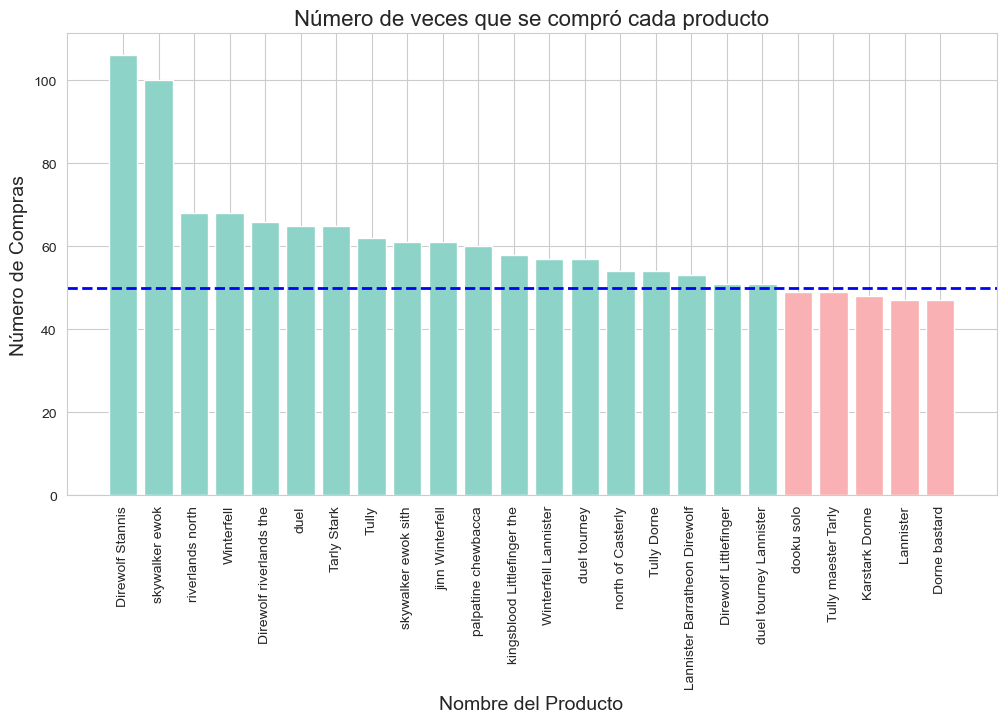

In [90]:
## con matplotlib

# Configurar el estilo del gráfico
plt.figure(figsize=(12, 6))
# Colores de las barras basados en el número de ventas
colors = ['#F9B1B3' if x < 50 else '#8DD3C7' for x in product_counts['num_ventas']]

plt.bar(product_counts['product_name'], product_counts['num_ventas'], color = colors)

plt.axhline(y=50, color='blue', linestyle='--', linewidth=2, label='Mínimo de 50 ventas')

# Añadir títulos y etiquetas
plt.title('Número de veces que se compró cada producto', fontsize=16)
plt.xlabel('Nombre del Producto', fontsize=14)
plt.ylabel('Número de Compras', fontsize=14)

# Rotar las etiquetas del eje x para que no se solapen
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


# Exercici 2:

Dues variables numèriques.

He decidido graficar el número de productos que se han comprado en cada transacción vs. el amount de la transacción, para detectar si hay relación entre el número de productos comprados y lo que se ha gastado el usuario. Podríamos detectar cuantos productos mínimos debería comprar un usuario.

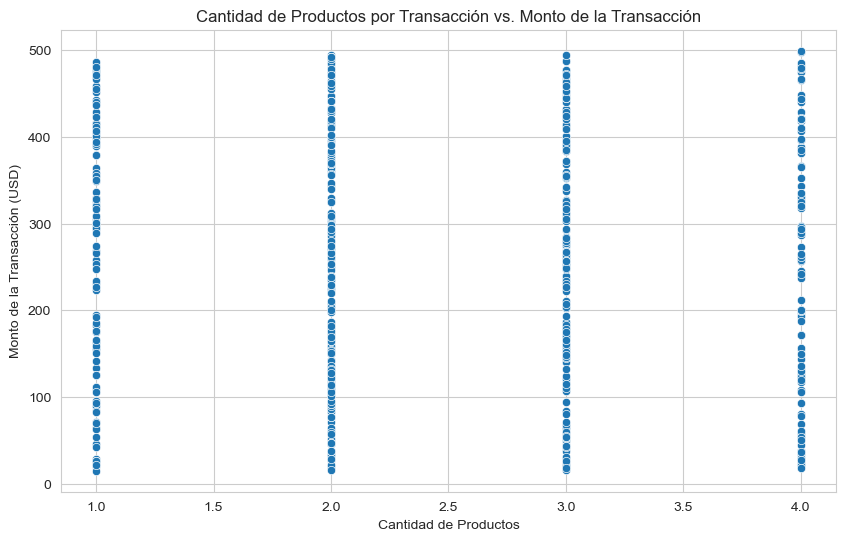

In [104]:
# Calcular la cantidad de productos por transacción
product_transaction= df_transaction_products.groupby('transaction_id').size().reset_index(name='product_count')

# Unimos la tabla creada con transactions para podergraficar, mediante un merge
merge_products_transactions= pd.merge(df_transactions,product_transaction, left_on='id', right_on='transaction_id')

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_count', y='amount', data=merge_products_transactions)
plt.title('Cantidad de Productos por Transacción vs. Monto de la Transacción')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Monto de la Transacción (USD)')
plt.show()



A través de esta gráfica podemos observar que no hay una relación entre el número de productos que copra un usuario y la cantidad que gasta en la compra.
Quizás se podría ver más claro en un boxplot:

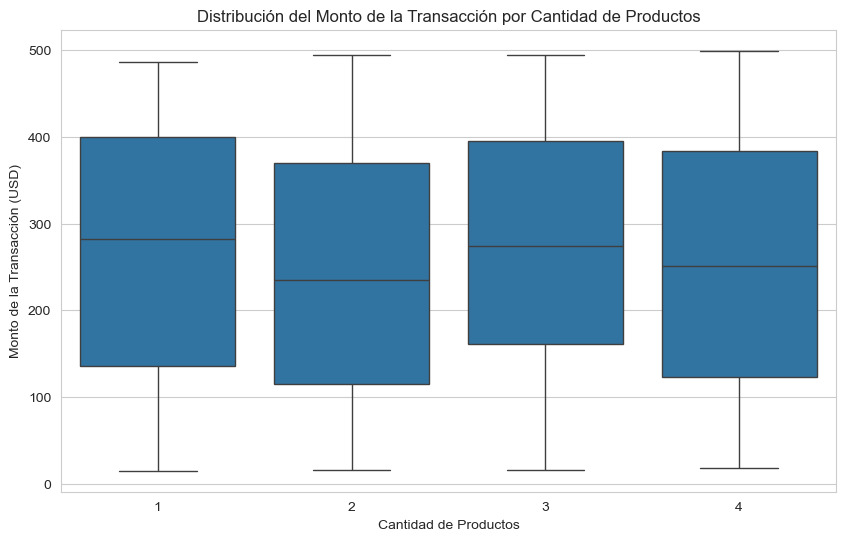

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_count', y='amount', data=merge_products_transactions)
plt.title('Distribución del Monto de la Transacción por Cantidad de Productos')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Monto de la Transacción (USD)')
plt.show()

## Exercici 3
Una variable categòrica.

Para este ejercicio he decidido graficar la cantidad de transacciones por empresa.

In [ ]:
sns.barplot